
# Data Preprocessing & EDA


---
## Loading the libraries

In [24]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

RANDOM_STATE=42
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

---
## Read the Dataset

In [2]:
org_df = pd.read_csv('airlinedelaycauses_DelayedFlights.csv', index_col=0).reset_index(drop=True) 
df = org_df.copy()

display(df.head())

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4   1829.0        1755   1959.0   
4  2008      1           3          4   1940.0        1915   2121.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0          0   
1        1000            WN       3231  ...    5.0     10.0          0   
2         750            WN        448  ...    3.0     17.0          0   
3        1925            WN       3920  ...    3.0     10.0          0   
4        2110            WN        378  ...    4.0     10.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                 N         0           NaN          NaN      NaN   
1                 N         0           NaN          NaN      NaN   
2                 N         0           NaN          NaN      NaN   
3                 N         0           2.0          0.0      0.0   
4                 N         0           NaN          NaN      NaN   

   SecurityDelay  LateAircraftDelay  
0            NaN                NaN  
1            NaN                NaN  
2            NaN                NaN  
3            0.0               32.0  
4            NaN                NaN  

[5 rows x 29 columns]

---
## Preliminary analysis of a dataset

In [3]:
print('Shape of the dataset:\n-------------------------------------------------------------')
print(f'{df.shape[0]} x {df.shape[1]}\n\n')

print('Basic info of the dataset:\n-------------------------------------------------------------')
print(df.info(), '\n\n')

print('Sum of NaN values in each column:\n-------------------------------------------------------------')
print(df.isna().sum(), '\n\n')

Shape of the dataset:
-------------------------------------------------------------
1936758 x 29


Basic info of the dataset:
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             flo

In [4]:
print('Duplicates in the dataset:\n-------------------------------------------------------------')
display(df.loc[df.duplicated()])

print('\n\n\nUnique data in the dataset:\n-------------------------------------------------------------')
print(df.nunique().sort_values())

Duplicates in the dataset:
-------------------------------------------------------------


Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
294863  2008      2          28          4   1854.0        1807   1946.0   
294865  2008      2          28          4   2027.0        1942   2314.0   

        CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
294863        1902            F9        773  ...    8.0     13.0          0   
294865        2229            F9        780  ...   10.0     13.0          0   

        CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
294863                 N         0          44.0          0.0      0.0   
294865                 N         0           1.0          0.0     44.0   

        SecurityDelay  LateAircraftDelay  
294863            0.0                0.0  
294865            0.0                0.0  

[2 rows x 29 columns]




Unique data in the dataset:
-------------------------------------------------------------
Year                    1
Diverted                2
Cancelled               2
CancellationCode        4
DayOfWeek               7
Month                  12
UniqueCarrier          20
DayofMonth             31
SecurityDelay         156
TaxiIn                180
Origin                303
Dest                  304
TaxiOut               332
CRSElapsedTime        515
LateAircraftDelay     564
NASDelay              574
WeatherDelay          599
AirTime               650
ActualElapsedTime     673
CarrierDelay          983
DepDelay             1058
ArrDelay             1128
CRSDepTime           1207
CRSArrTime           1364
Distance             1419
DepTime              1438
ArrTime              1440
TailNum              5366
FlightNum            7499
dtype: int64


In [5]:
# Summary Statistics of the dataset

df.describe()

Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  1936758.0  1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06   
mean      2008.0  6.111106e+00  1.575347e+01  3.984827e+00  1.518534e+03   
std          0.0  3.482546e+00  8.776272e+00  1.995966e+00  4.504853e+02   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  3.000000e+00  8.000000e+00  2.000000e+00  1.203000e+03   
50%       2008.0  6.000000e+00  1.600000e+01  4.000000e+00  1.545000e+03   
75%       2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.900000e+03   
max       2008.0  1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  1.936758e+06  1.929648e+06  1.936758e+06  1.936758e+06   
mean   1.467473e+03  1.610141e+03  1.634225e+03  2.184263e+03   
std    4.247668e+02  5.481781e+02  4.646347e+02  1.944702e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    1.135000e+03  1.316000e+03  1.325000e+03  6.100000e+02   
50%    1.510000e+03  1.715000e+03  1.705000e+03  1.543000e+03   
75%    1.815000e+03  2.030000e+03  2.014000e+03  3.422000e+03   
max    2.359000e+03  2.400000e+03  2.400000e+03  9.742000e+03   

       ActualElapsedTime  ...      Distance        TaxiIn       TaxiOut  \
count       1.928371e+06  ...  1.936758e+06  1.929648e+06  1.936303e+06   
mean        1.333059e+02  ...  7.656862e+02  6.812975e+00  1.823220e+01   
std         7.206007e+01  ...  5.744797e+02  5.273595e+00  1.433853e+01   
min         1.400000e+01  ...  1.100000e+01  0.000000e+00  0.000000e+00   
25%         8.000000e+01  ...  3.380000e+02  4.000000e+00  1.000000e+01   
50%         1.160000e+02  ...  6.060000e+02  6.000000e+00  1.400000e+01   
75%         1.650000e+02  ...  9.980000e+02  8.000000e+00  2.100000e+01   
max         1.114000e+03  ...  4.962000e+03  2.400000e+02  4.220000e+02   

          Cancelled      Diverted  CarrierDelay  WeatherDelay      NASDelay  \
count  1.936758e+06  1.936758e+06  1.247488e+06  1.247488e+06  1.247488e+06   
mean   3.268348e-04  4.003598e-03  1.917940e+01  3.703571e+00  1.502164e+01   
std    1.807562e-02  6.314722e-02  4.354621e+01  2.149290e+01  3.383305e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  2.000000e+00  0.000000e+00  2.000000e+00   
75%    0.000000e+00  0.000000e+00  2.100000e+01  0.000000e+00  1.500000e+01   
max    1.000000e+00  1.000000e+00  2.436000e+03  1.352000e+03  1.357000e+03   

       SecurityDelay  LateAircraftDelay  
count   1.247488e+06       1.247488e+06  
mean    9.013714e-02       2.529647e+01  
std     2.022714e+00       4.205486e+01  
min     0.000000e+00       0.000000e+00  
25%     0.000000e+00       0.000000e+00  
50%     0.000000e+00       8.000000e+00  
75%     0.000000e+00       3.300000e+01  
max     3.920000e+02       1.316000e+03  

[8 rows x 24 columns]

In [6]:
# Analysis of unique categories in categorical data

categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes('number').columns

for column in categorical_columns:
    print(f'{column}:\n', df[column].unique(), '\n')

UniqueCarrier:
 ['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO'] 

TailNum:
 ['N712SW' 'N772SW' 'N428WN' ... 'N75428' 'N75429' 'N78008'] 

Origin:
 ['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'LCH' 'BOS' 'MYR' 'CLL' 'DAB' 'ASE' 'ATW' 'BMI' '

---
## CONCLUSION from preliminary analysis of a dataset:
---
### **Shape of a Dataset**:     
Shape of the dataset is: 1936758 rows x 29 columns (without index column).      

### **Target Class**
Target class is combination of all of the delay columns into one column by adding them up. This is the new target and after the NaN values in the individual columns are deleted, they will be summarized in one column.

### **NaN values**:  
There are 689270 rows with NaN values from the target features that should be deleted, because this is the target class we are predicting, imputation is not allowed.

There were other columns with NaN values, but after deleting the NaN from target features, other NaN values were also deleted, because they were in the same rows with the deleted ones.

There were only 2 NaN values in one of the columns, and they were deleted as well.

Deletion is done below in the code.

### **Constant values**:  
Column 'Year' has only one constant value so it will be deleted.

After rows deletion with NaN values, it was observed that three more columns had constant values: 'CancellationCode', 'Cancelled', 'Diverted'. They will be deleted from the dataset as well.  

### **Non-informative and semantic irrelevant features**
Columns 'FlightNum' and 'DayOfMonth' in my opinion are semantic irrelevant features and should be deleted from the dataset. 

### **Data types**:  
All features have appropriate data type.

### **Duplicates**:  
There are 2 duplicate rows in the dataset and they will be deleted.

### **Typos**:       
There are no typos that need to be corrected.

### **Descriptive statistics**:
The summary statistics for the numerical columns in the dataset shows quick overview of the distribution and data variability that occurs in all columns. 
Column 'year' has constant value and should be deleted.
It is recommended to scale the features in order to ensure that they are on a similar scale, because some ML algorithms are sensitive to the scale of the features.

---
## Handling missing values (Detailed analysis and Deletion)

In [7]:
# Dropping irrelevant features: 

cols_to_drop_irr = ['FlightNum', 'DayofMonth']
df = df.drop(columns=cols_to_drop_irr)

In [8]:
# Dropping constant features:

cols_to_drop_const = ['Year']
df = df.drop(columns=cols_to_drop_const)

In [9]:
# Dropping NaN values from individual delay columns (targets), summing them in one column, and deleting the old ones from the dataset

print("Dropping NaN targets from individual delay columns:")
print(df.isna().sum()[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']])
df.dropna(subset=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], how='any', inplace=True)

print("\nNaN values after deleting:")
print(df.isna().sum()[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']])

# Summing the individual delay columns
df['Delay'] = df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay']

# Drop the individual delay columns 
cols_to_drop_target = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df = df.drop(columns=cols_to_drop_target)

Dropping NaN targets from individual delay columns:
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

NaN values after deleting:
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [10]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

In [11]:
# One final analysis after cleaning the dataset

print('Shape of the dataset:\n-------------------------------------------------------------')
print(f'{df.shape[0]} x {df.shape[1]}\n\n')

print('Basic info of the dataset:\n-------------------------------------------------------------')
print(df.info(), '\n\n')

print('Sum of NaN values in each column:\n-------------------------------------------------------------')
print(df.isna().sum(), '\n\n')

print('Duplicates in the dataset:\n-------------------------------------------------------------')
display(df.loc[df.duplicated()])

Shape of the dataset:
-------------------------------------------------------------
1247486 x 22


Basic info of the dataset:
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1247486 entries, 3 to 1936755
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Month              1247486 non-null  int64  
 1   DayOfWeek          1247486 non-null  int64  
 2   DepTime            1247486 non-null  float64
 3   CRSDepTime         1247486 non-null  int64  
 4   ArrTime            1247486 non-null  float64
 5   CRSArrTime         1247486 non-null  int64  
 6   UniqueCarrier      1247486 non-null  object 
 7   TailNum            1247484 non-null  object 
 8   ActualElapsedTime  1247486 non-null  float64
 9   CRSElapsedTime     1247486 non-null  float64
 10  AirTime            1247486 non-null  float64
 11  ArrDelay           1247486 non-null  float64
 12 

Empty DataFrame
Columns: [Month, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Origin, Dest, Distance, TaxiIn, TaxiOut, Cancelled, CancellationCode, Diverted, Delay]
Index: []

[0 rows x 22 columns]

In [12]:
# Dropping NaN values from 'TailNum' column

df.dropna(subset=['TailNum'], how='all', inplace=True)
print('Sum of NaN values in each column:\n-------------------------------------------------------------')
print(df.isna().sum(), '\n\n')

Sum of NaN values in each column:
-------------------------------------------------------------
Month                0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
Delay                0
dtype: int64 




In [13]:
print('Unique data in the dataset after some manipulations:\n-------------------------------------------------------------')
print(df.nunique().sort_values())

Unique data in the dataset after some manipulations:
-------------------------------------------------------------
CancellationCode        1
Cancelled               1
Diverted                1
DayOfWeek               7
Month                  12
UniqueCarrier          20
TaxiIn                180
Dest                  301
Origin                302
TaxiOut               332
CRSElapsedTime        497
AirTime               645
ActualElapsedTime     668
ArrDelay             1044
Delay                1044
DepDelay             1053
CRSDepTime           1182
CRSArrTime           1350
Distance             1404
DepTime              1435
ArrTime              1440
TailNum              5349
dtype: int64


In [14]:
# Dropping aditional constant features:

cols_to_drop_const = ['CancellationCode', 'Cancelled', 'Diverted']
df = df.drop(columns=cols_to_drop_const)

print('Shape of the dataset:\n-------------------------------------------------------------')
print(f'{df.shape[0]} x {df.shape[1]}\n\n')

Shape of the dataset:
-------------------------------------------------------------
1247484 x 19




---
## Exploratory Data Analysis

In [15]:
categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes('number').columns

cat_cols = list(categorical_columns)
num_cols = list(numerical_columns)

### Target class analysis

Distribution of the target class:
-----------------------------------------------------------------------------------------------------------
Delay
15.0      32476
16.0      31198
17.0      30288
18.0      29816
19.0      28658
          ...  
1707.0        1
1018.0        1
734.0         1
978.0         1
991.0         1
Name: count, Length: 1044, dtype: int64



Unique data in the target class:
-------------------------------------------------------------
1044

Since the target class has 1044 unique values, it needs to be digitized by converting them into a discrete variable.


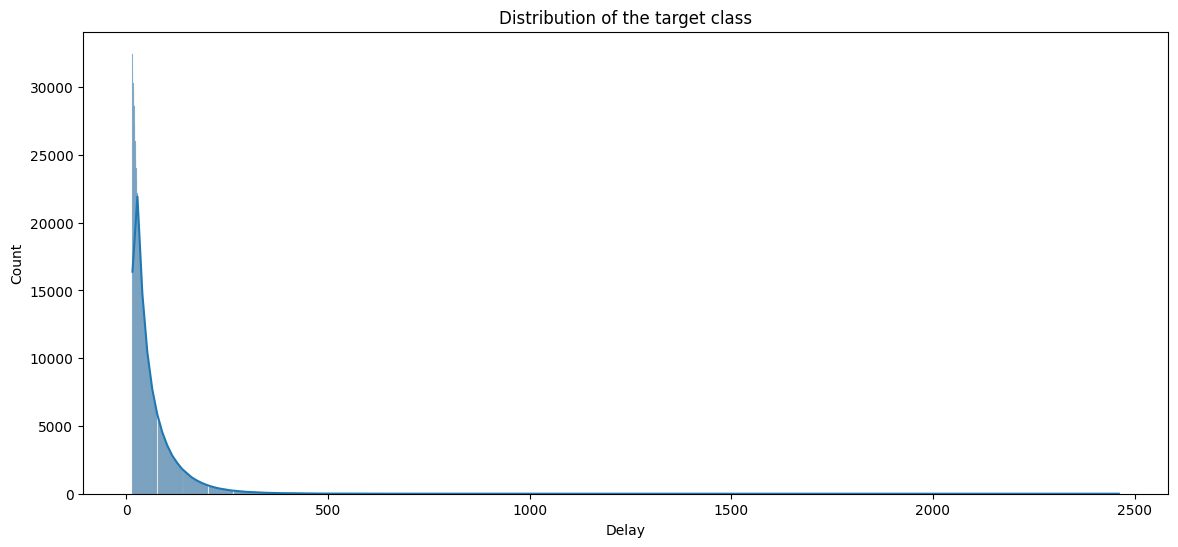

In [16]:
print('Distribution of the target class:')
print('-----------------------------------------------------------------------------------------------------------')
print(df['Delay'].value_counts())

print('\n\n\nUnique data in the target class:\n-------------------------------------------------------------')
print(df['Delay'].nunique())

print('\nSince the target class has 1044 unique values, it needs to be digitized by converting them into a discrete variable.')

fig = plt.figure(figsize=(14, 6))
sns.histplot(df, x=df['Delay'], kde=True)
plt.title('Distribution of the target class')
plt.show()

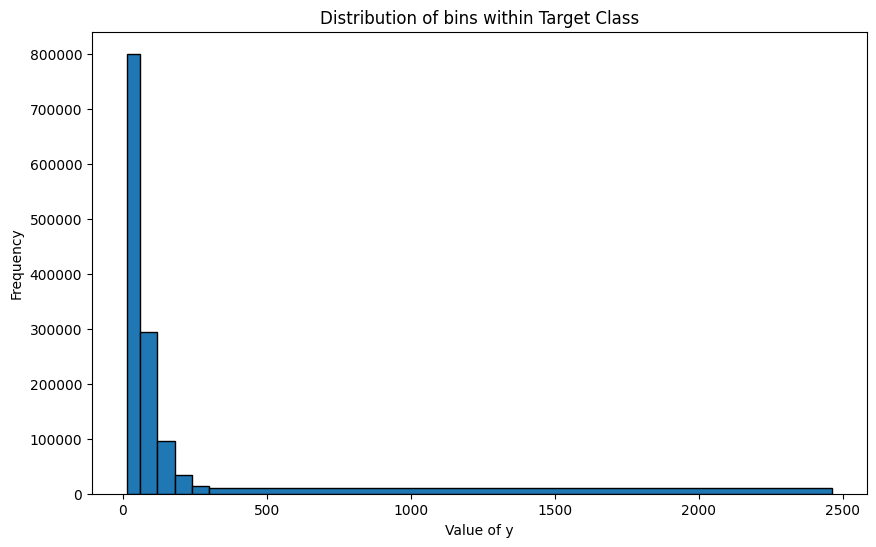

Bin 1: 799657 samples
Bin 2: 293221 samples
Bin 3: 95963 samples
Bin 4: 34499 samples
Bin 5: 13322 samples
Bin 6: 10822 samples


In [17]:
y = df['Delay']
bins = [15, 60, 120, 180, 240, 300, 2462]
y_binned = np.digitize(y, bins=bins, right=True)

plt.figure(figsize=(10, 6))
plt.hist(y, bins=bins, edgecolor='k')
plt.xlabel('Value of y')
plt.ylabel('Frequency')
plt.title('Distribution of bins within Target Class')
plt.show()

hist, bin_edges = np.histogram(y, bins=bins)

for i in range(len(hist)):
    print(f'Bin {i+1}: {hist[i]} samples')

### Target Class Analysis:
The target class is exponentially distributed and highly imbalanced. To address this, Stratified K-Folds cross-validation is the most suitable approach, as it ensures balanced representation of the target class across different folds for more reliable test scores.

The target class contains 1,044 unique values, which need to be converted into discrete variables (digitized). Since the target class represents delay time in minutes, I opted to create bins in one-hour increments.

All outliers are placed in the final bin. These outliers hold meaningful information, so I decided to retain them rather than exclude them from the dataset.

---

### Correlation between columns

<Axes: >

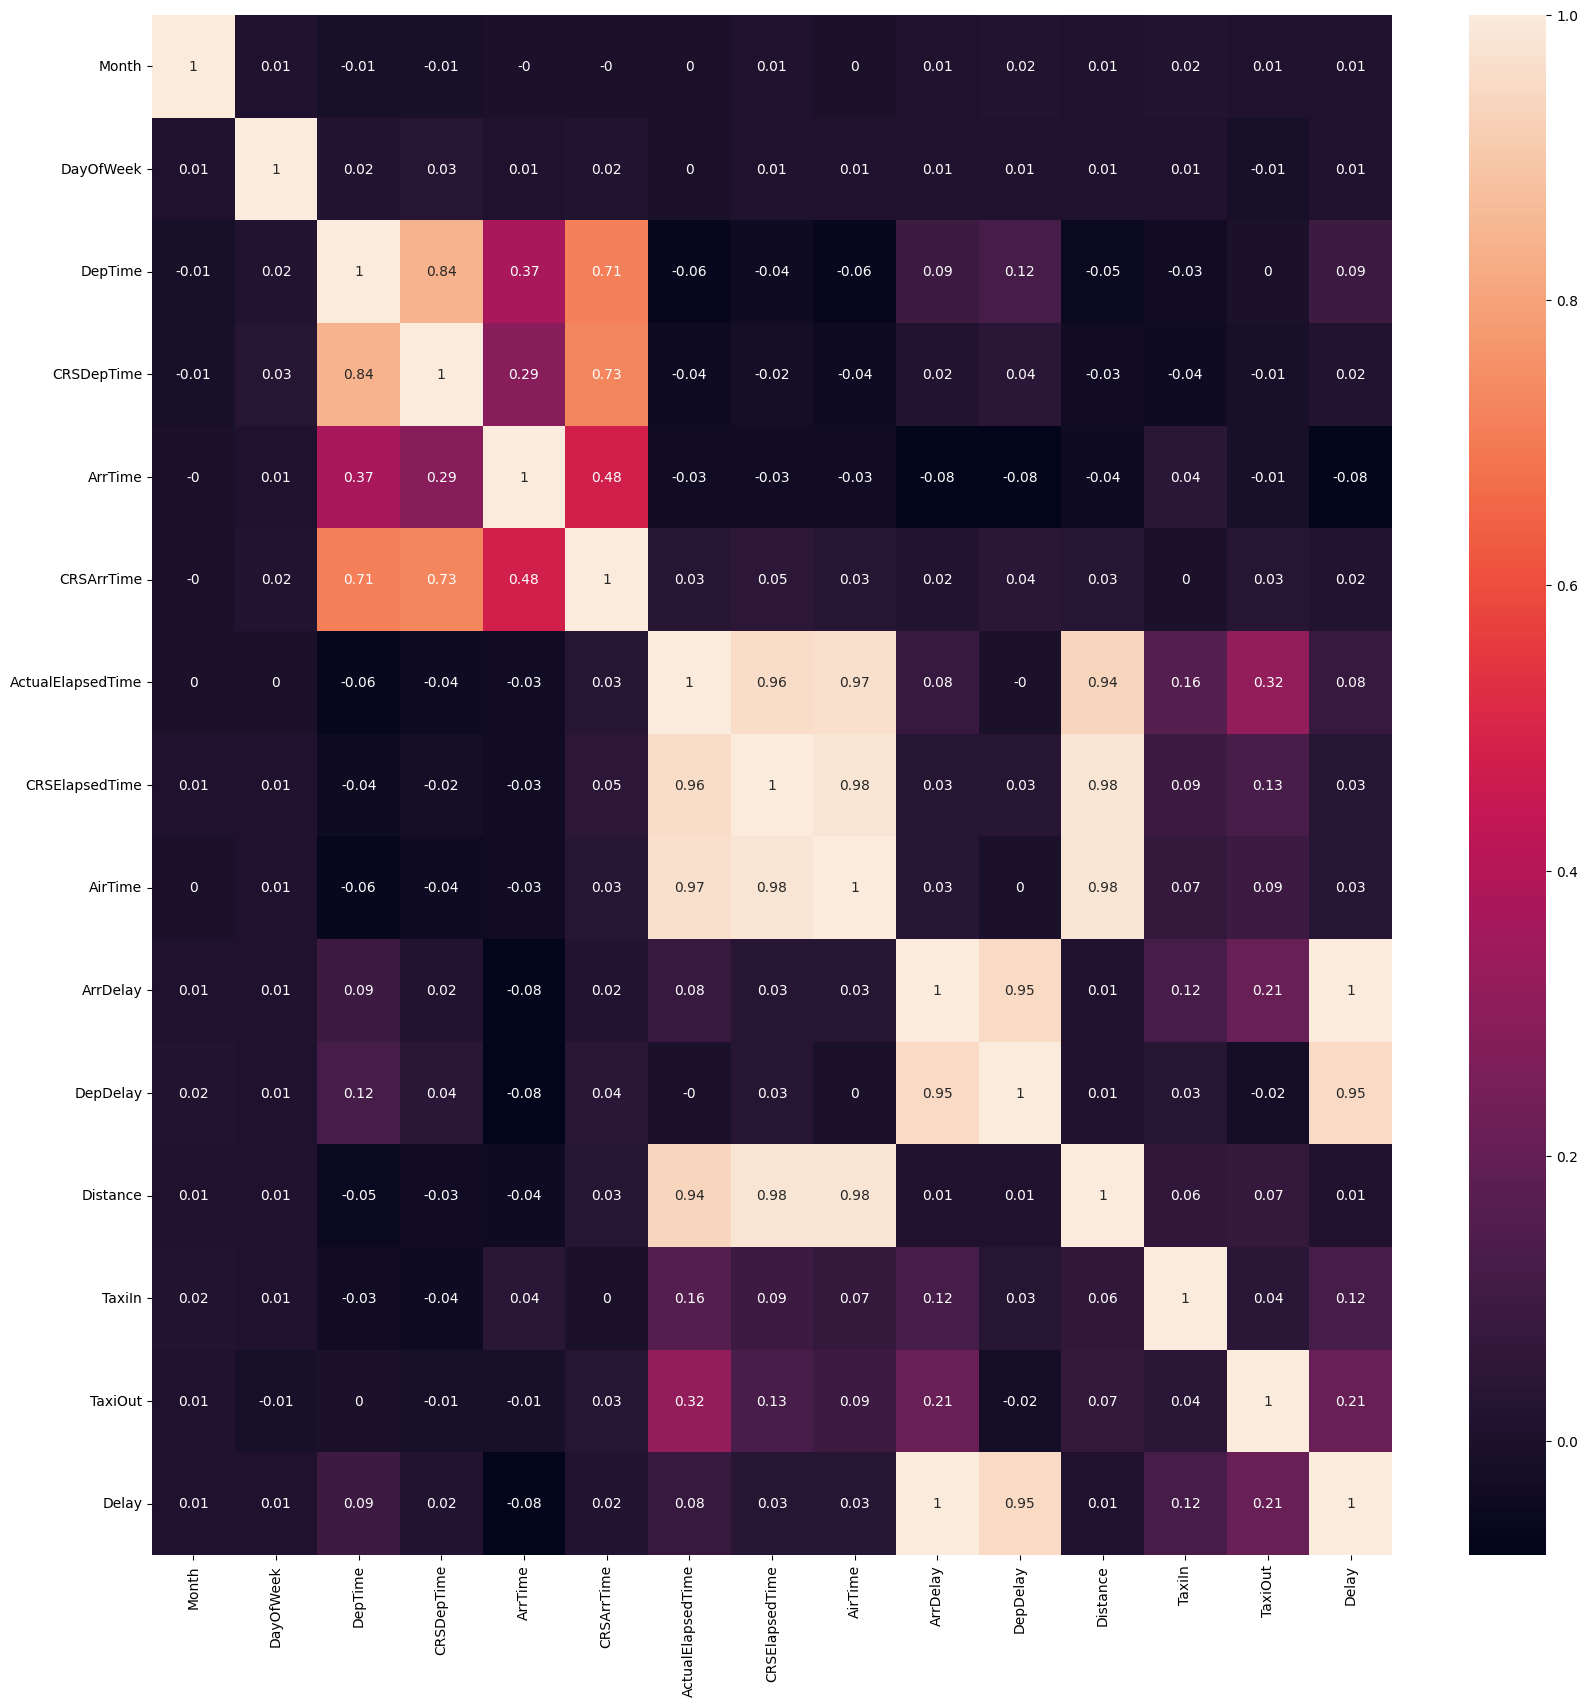

In [18]:
df_corr = df.corr(numeric_only=True, method='pearson').round(decimals=2)
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True) 

In [19]:
# Dropping aditional features after correlation analysis:

cols_to_drop_eda = ['DepDelay', 'ArrDelay', 'CRSElapsedTime', 'AirTime', 'Distance']
df = df.drop(columns=cols_to_drop_eda)

df = df.reset_index(drop=True)

### Key Findings from the Heatmap Analysis:
##### Correlation Between Target and Features
**1)** The heatmap reveals a very high positive correlation (95-100%) between the target class, 'Delay', and the features 'ArrDelay' and 'DepDelay'. These features are essentially equivalent to the target variable and are not predictors, so they will be removed.
**2)** The target variable shows low correlation with all other features. However, this alone is not a sufficient reason to exclude them from the model.
        
##### Correlation Among Features
**1)** The heatmap indicates a strong positive correlation among the features 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', and 'Distance'. To avoid redundancy, three of these features will be removed. I chose to keep 'ActualElapsedTime' because it has a stronger correlation with the target variable compared to the others.
**2)** Other features, such as 'DepTime', 'CRSDepTime', 'AirTime', and 'CRSArrTime', also exhibit moderate to high correlation (40-84%). However, I decided to retain them in the dataset for further analysis.

---


### Visual representation of the Dataset

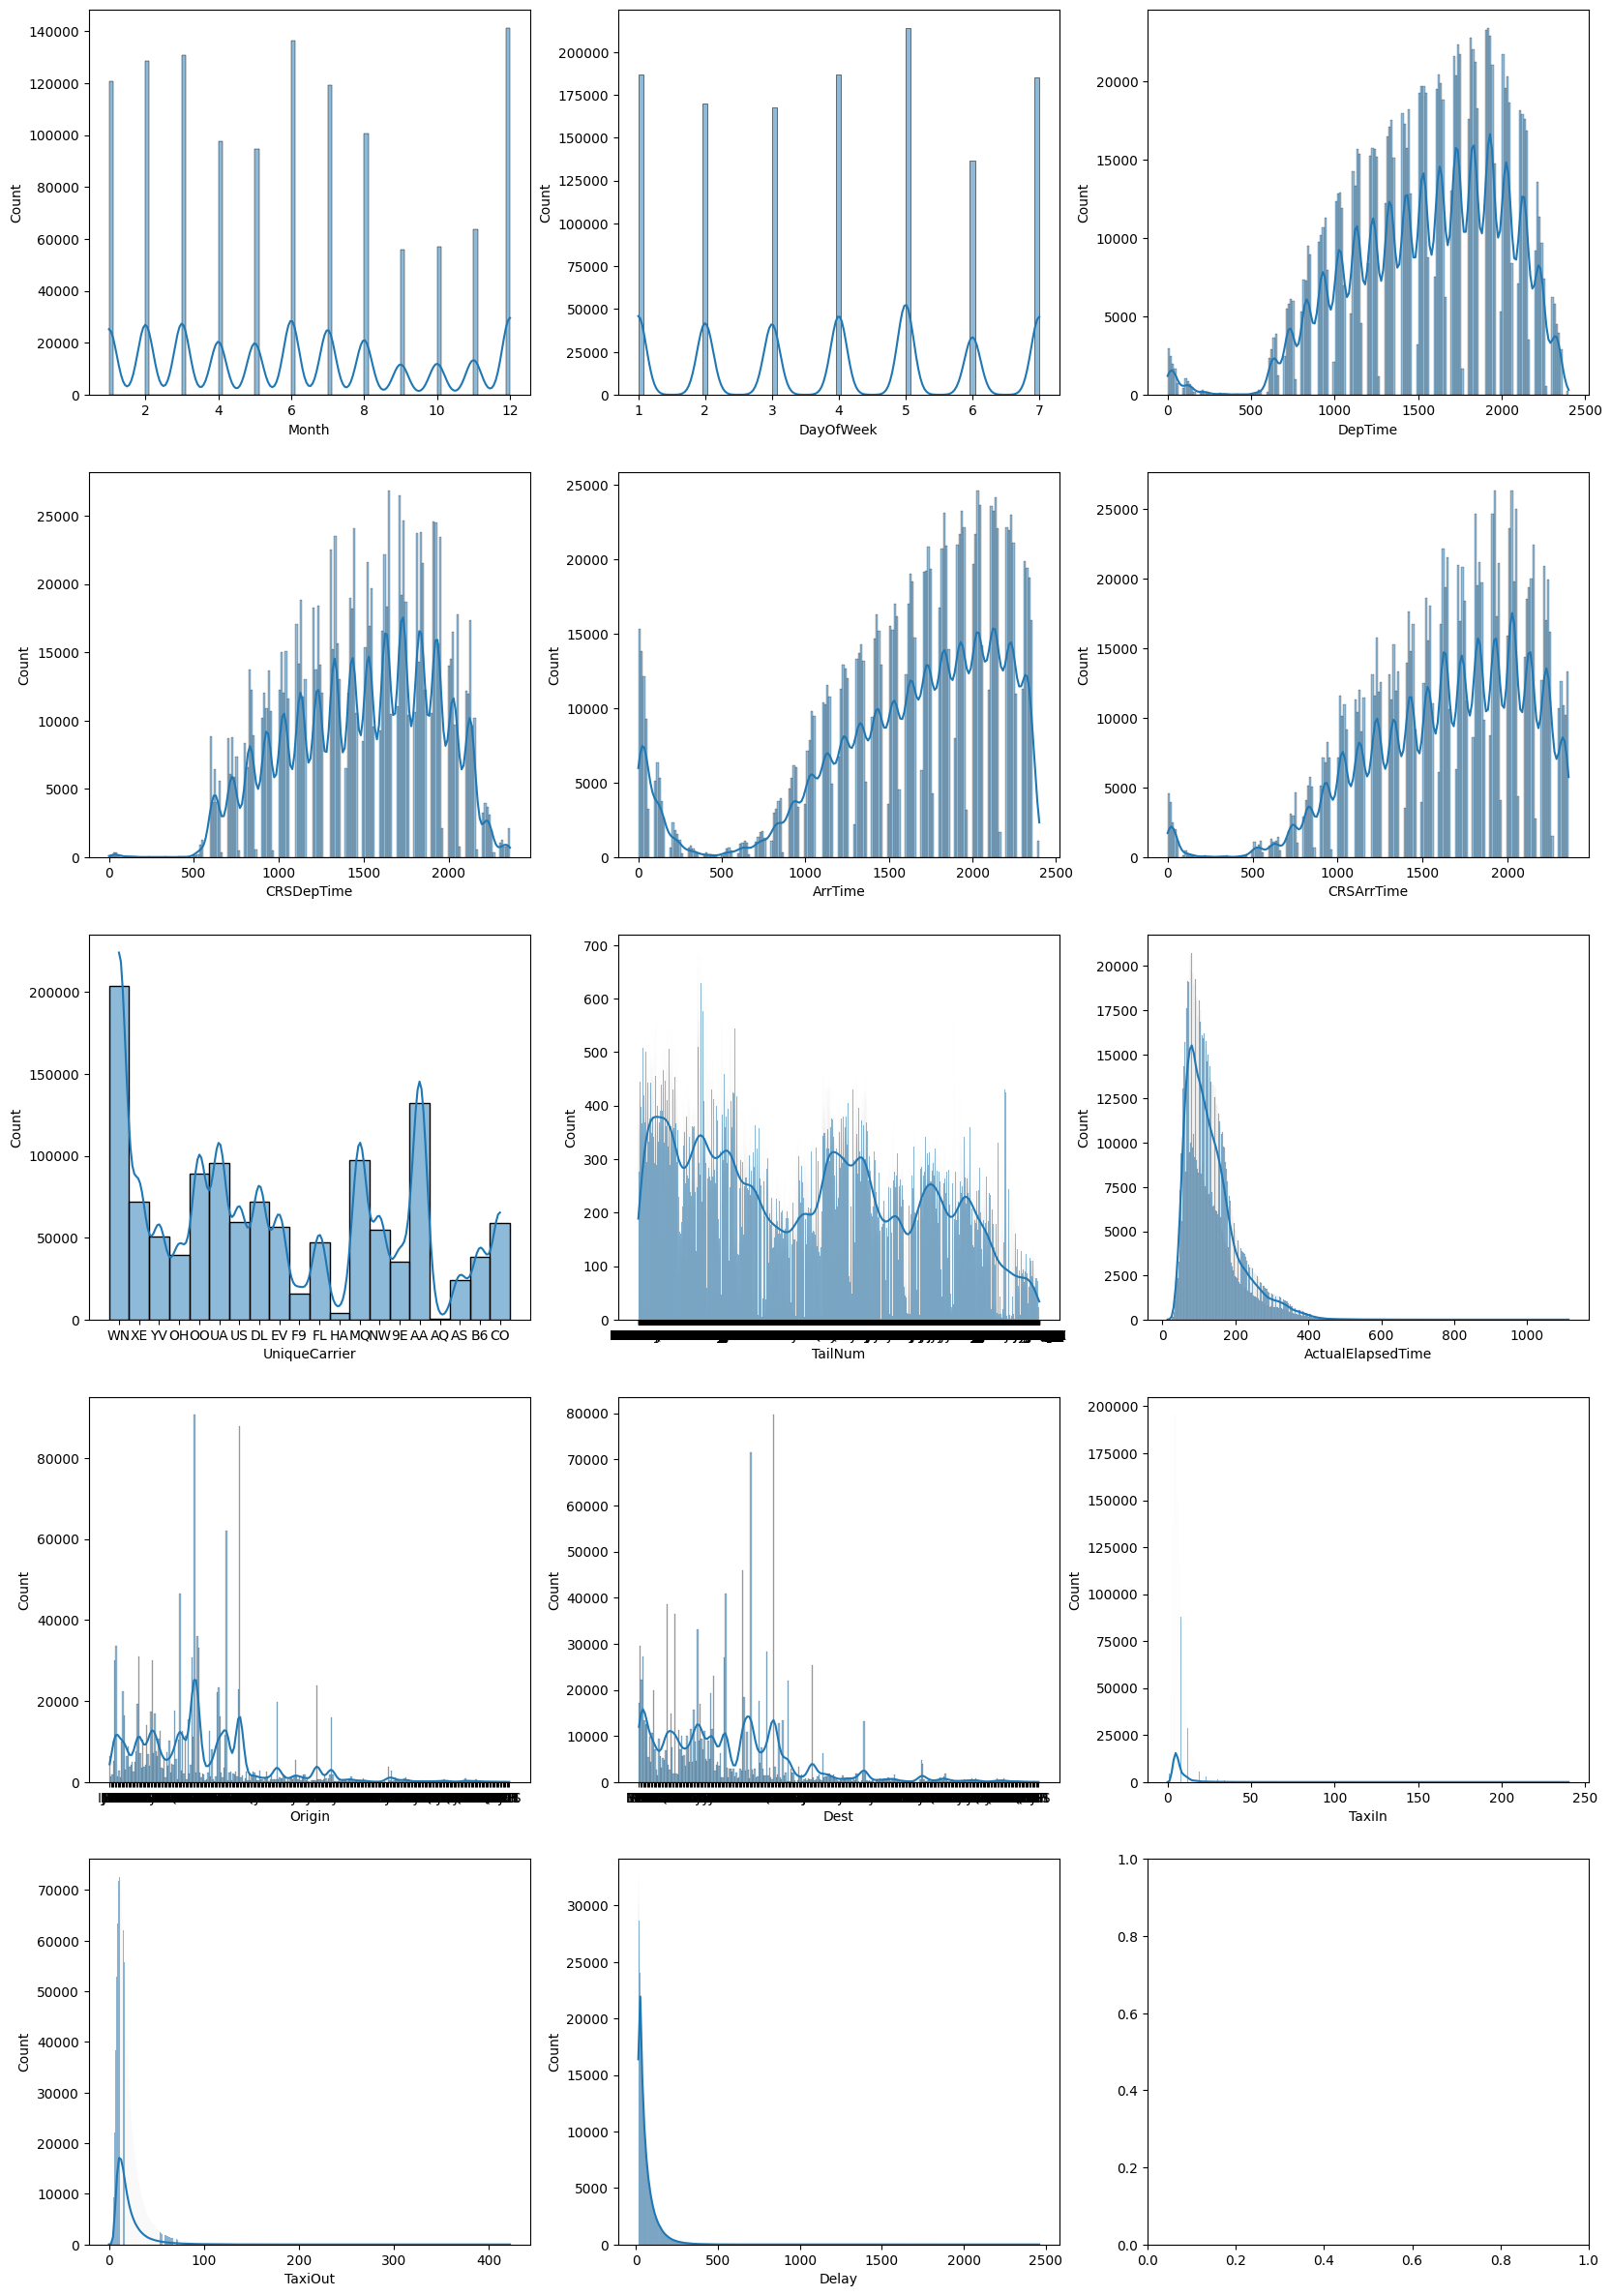

In [20]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,30))
axs = axs.ravel()

for i, c in enumerate(df):
    sns.histplot(df, x=df[c], ax=axs[i], kde=True)

### Key findings from Histplots:  
Many of the columns have exponental distribution skewed to the left.

---

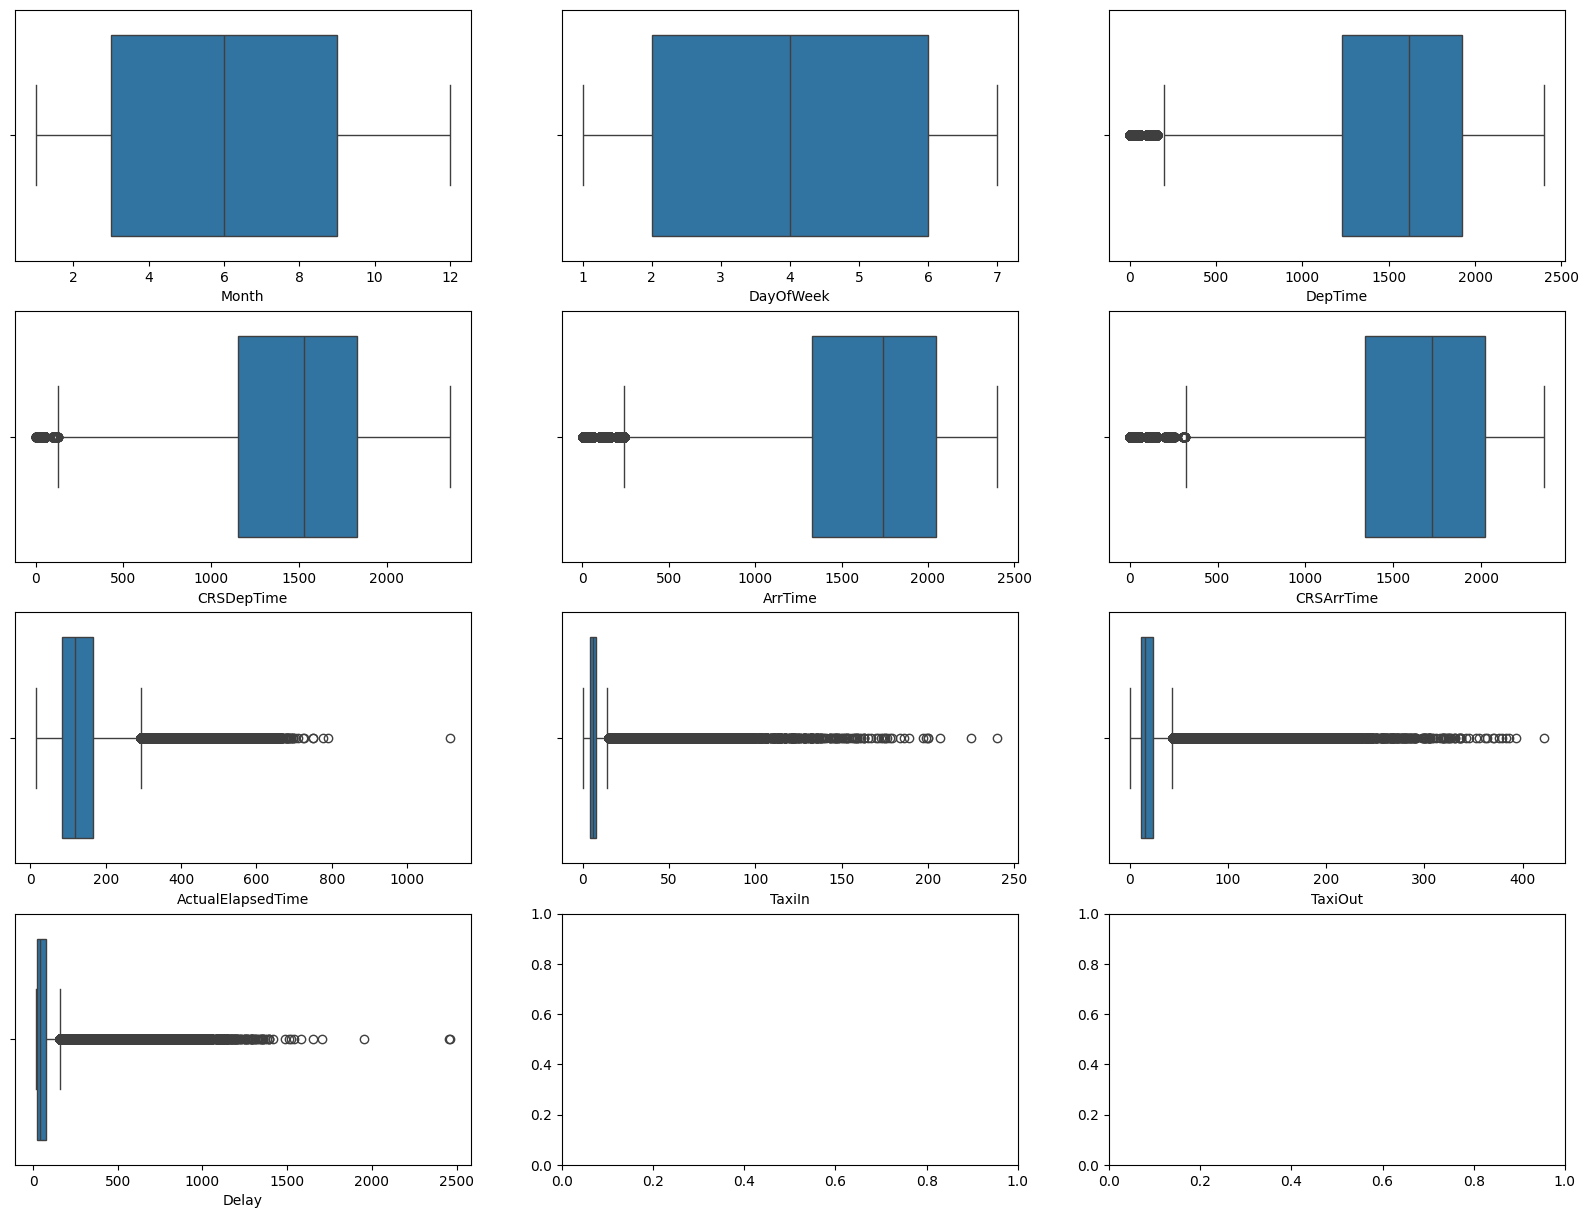

In [21]:
numerical_columns = df.select_dtypes('number').columns

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
axs = axs.ravel()

for i, c in enumerate(numerical_columns):
    sns.boxplot(df, x=df[c], orient='h', ax=axs[i])

### Key findings from Boxplots:
Transformation needs to be done in three of the columns, in order to reduce the skewness in these features. 

---

### Handling Outliers 
#### Data Transformations on the features with skewed distribution

Boxplots after features transformation.


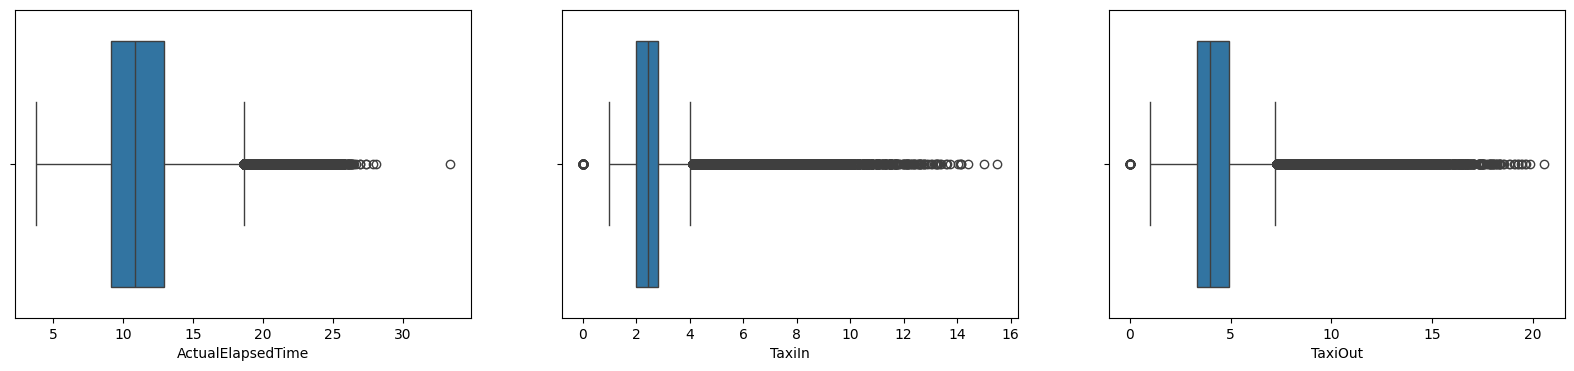

In [22]:
# Transformation on exponentially distributed features
# Transformations were made by applying np.sqrt() function on the skewed features.

sqrt_trans = ['ActualElapsedTime', 'TaxiIn', 'TaxiOut']

df[sqrt_trans] = df[sqrt_trans].apply(lambda x: np.sqrt(x))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
axs = axs.ravel()

for i, c in enumerate(df[sqrt_trans]):
    sns.boxplot(df, x=df[c], orient='h', ax=axs[i])
    
print('Boxplots after features transformation.')

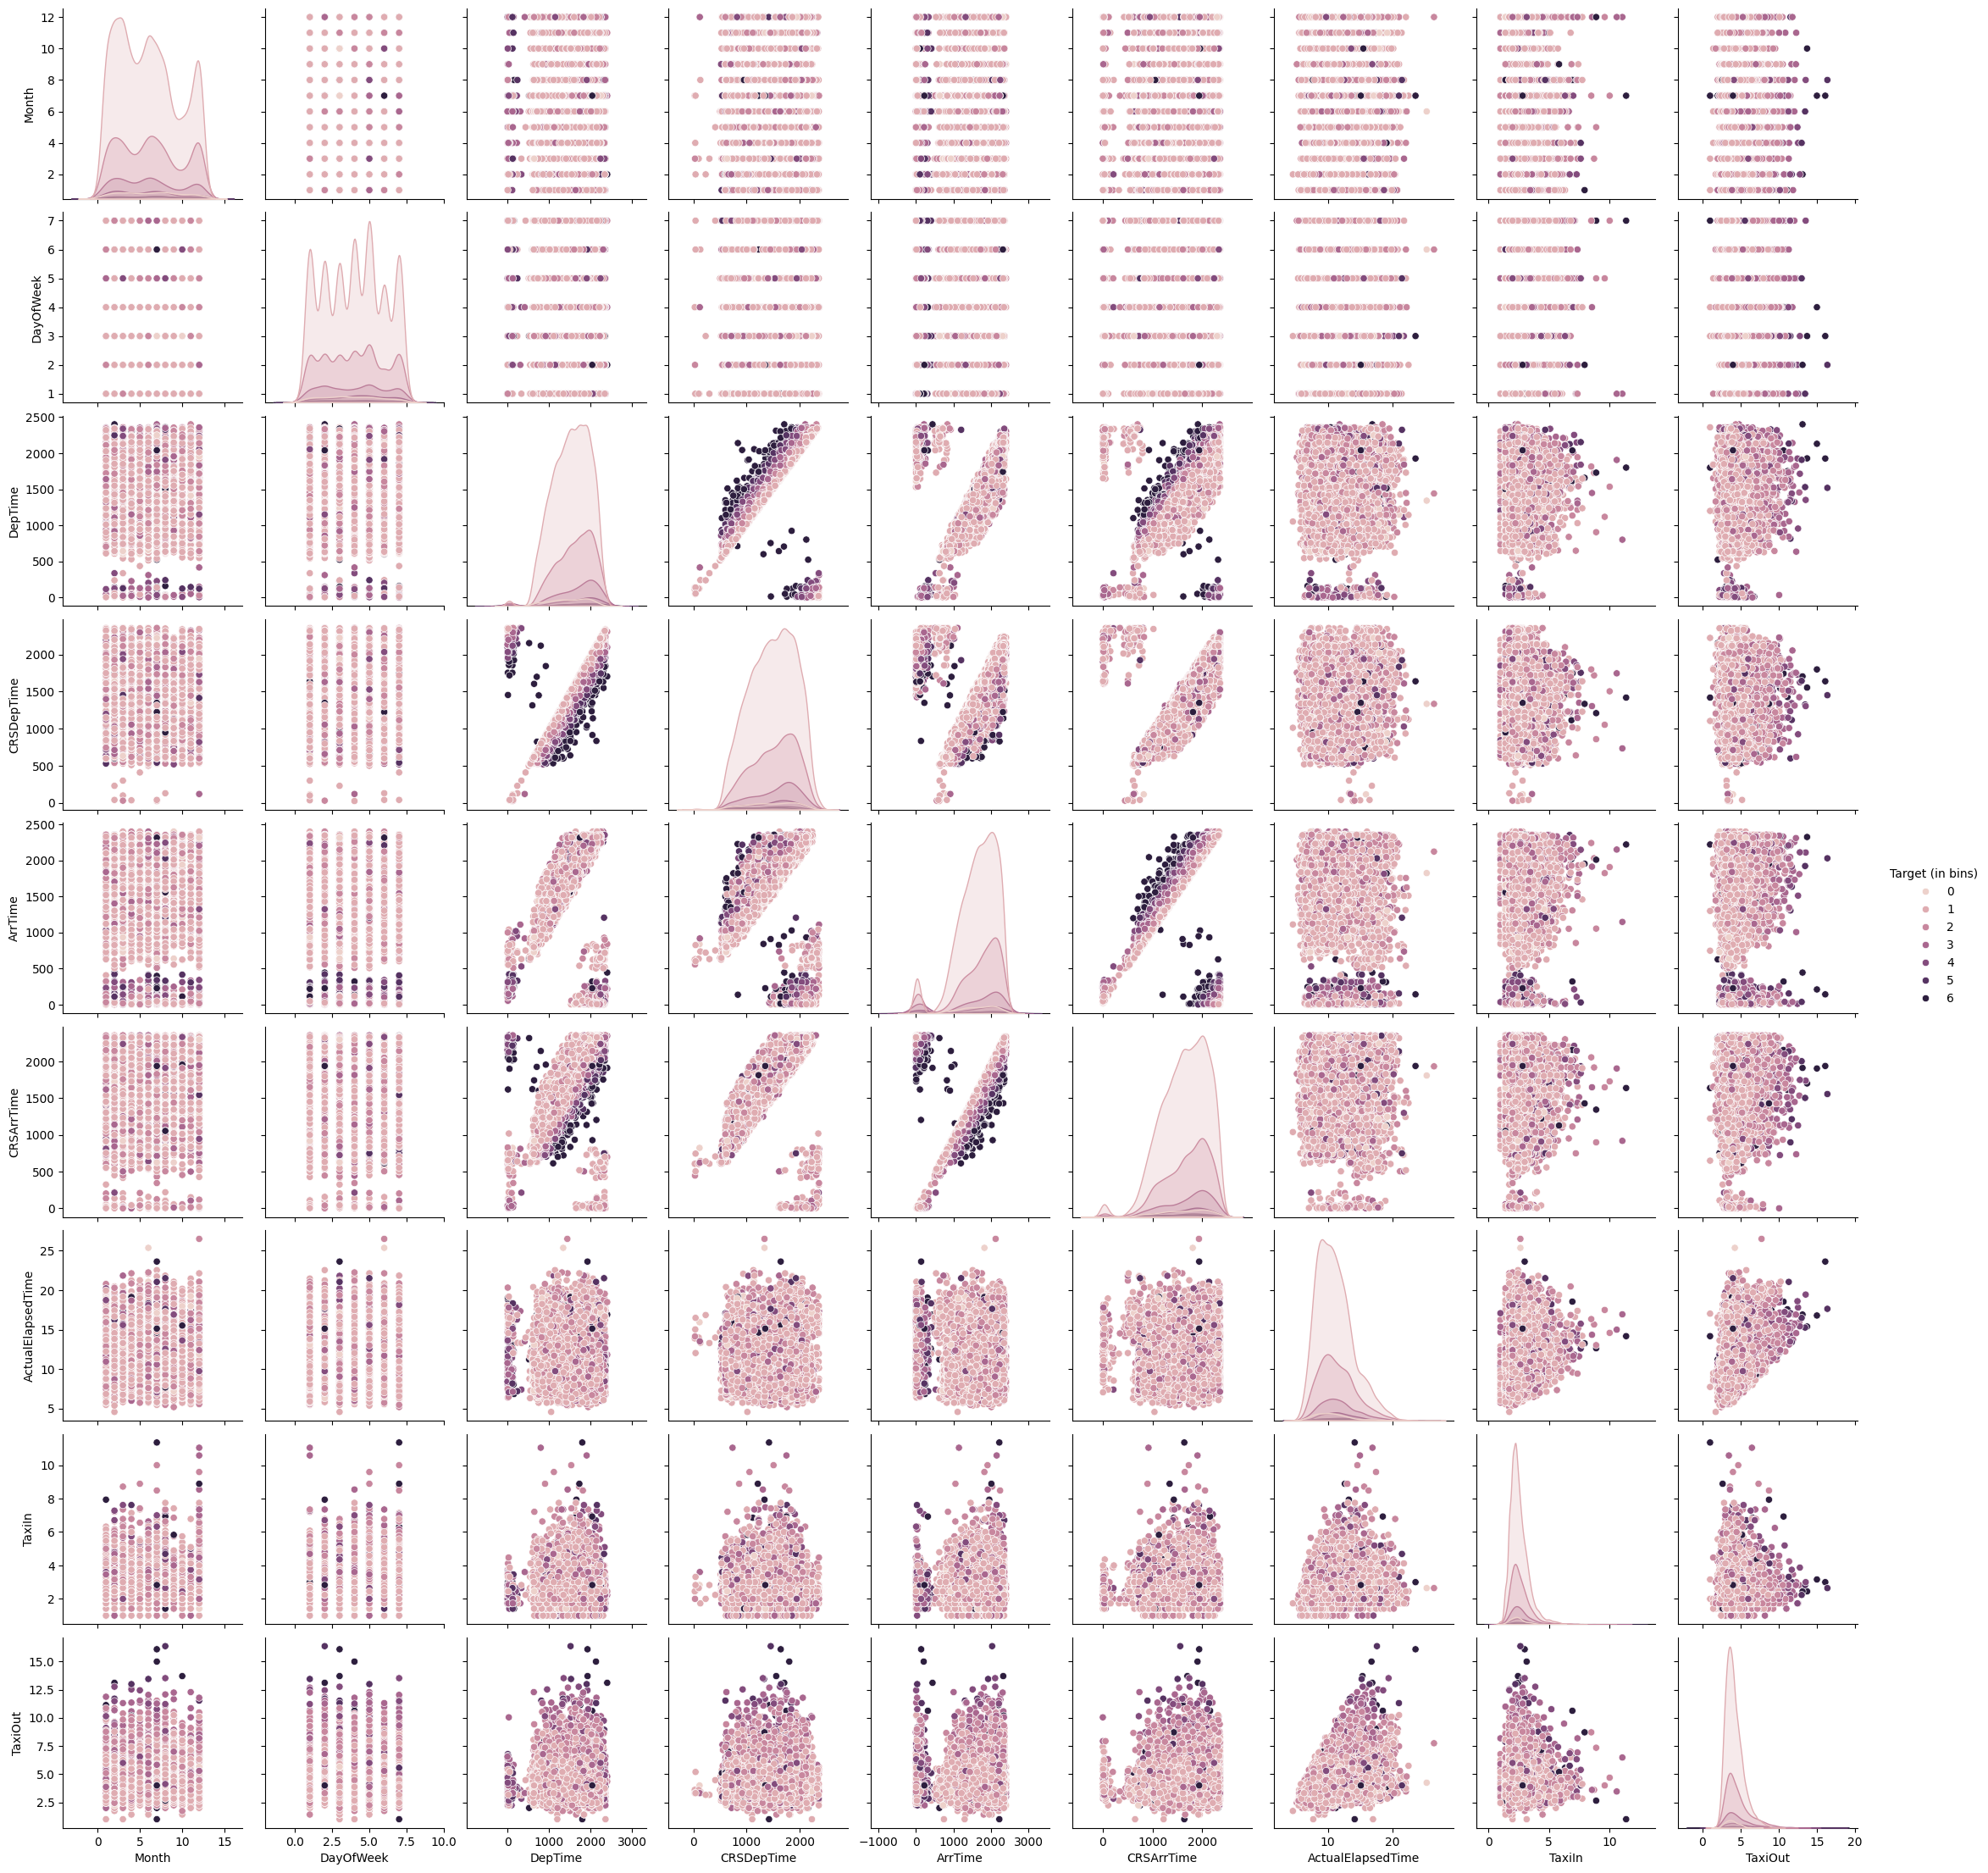

In [25]:
A = df.drop(columns=['Delay'])                            
b = df['Delay']

bins = [15, 60, 120, 180, 240, 300, 2462]
y_binned = np.digitize(b, bins=bins, right=True)


y_new = pd.Series(y_binned)
y_new.name = 'Target (in bins)'

X_train, X_test, y_train, y_test = train_test_split(A, y_new, test_size=0.01, stratify=y_binned, random_state=RANDOM_STATE)

df_pairplot = pd.concat([X_test, y_test], axis=1)

sns.pairplot(df_pairplot, hue='Target (in bins)')
plt.show()

### Key findings from Pairplot:
Pairwise relationships between variables in a dataset here unlike the other graphs, has hue in bins from the Target Class. 
There is evident pattern in few of the plots, which looks similar to linear dependence. These features were highly correlated in the Heatmap: 'DepTime, CRSDeptTime', 'AirTime', 'CSRArrTime' so there is obvious correlation from this plot as well. 

Also can be noted that: **the most frequent delays of the planes are recorded from 15-60 min. Delays of up to 2 and 3 hours have much fewer occurrences, while the rest of the delays are very rare.**

---

### Saving the clean dataset

In [26]:
# After all of the above transformations, I'm saving the cleaned dataset for further hyperpameter optimization

df.to_csv('AirlineDelay_CleanDataset.csv')